<h1><center>PRELIMINARY TASK</center></h1>
<center><img src ="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRRuWcrmow_pcdiQ93ub-v7PS-oMPyjO4G1zWJj-YOdoCdQl-TI"></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
musk = pd.read_csv("/home/rohit_psspl/Desktop/machine learning projects/musk/musk.csv")

In [3]:
musk.head()  # musk=1, non musk=0

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
musk.shape

(6598, 170)

In [5]:
musk = musk.drop(['ID','molecule_name','conformation_name'],axis=1)

In [6]:
musk.isnull().sum().sum()

0

Text(0, 0.5, 'frequency')

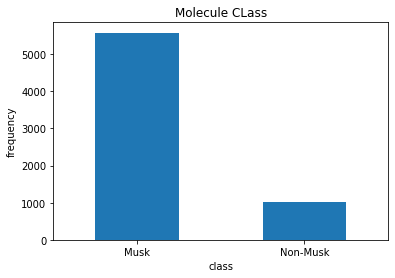

In [7]:
label = ["Musk","Non-Musk"]
count_classes = pd.value_counts(musk['class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Molecule CLass")
plt.xticks(range(2), labels=label)
plt.xlabel("class")
plt.ylabel("frequency")

In [8]:
corr = musk.corr()

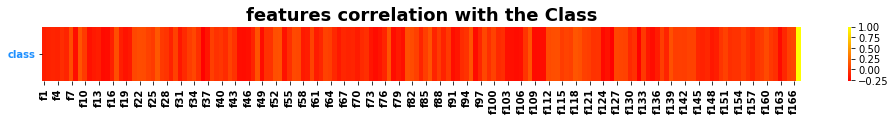

In [9]:
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(corr.sort_values(by=['class'],ascending=False).head(1), cmap='autumn')
plt.title("features correlation with the Class", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [10]:
realtion = corr['class'].head(31).to_frame()
cm = sns.light_palette("red", as_cmap=True)
realtion.style.background_gradient(cmap=cm)

,class
f1,-0.120883
f2,-0.0998958
f3,-0.0897596
f4,-0.0985921
f5,-0.0450396
f6,-0.0892478
f7,0.113093
f8,-0.201554
f9,0.147509
f10,0.0218956


In [11]:
X  = musk.drop('class',axis=1)
y = musk['class']

In [12]:
col_to_norm = X.columns

In [13]:
norm = X[col_to_norm].apply(lambda x : (x - x.min())/(x.max()-x.min()))

In [14]:
norm.shape

(6598, 166)

In [15]:
norm

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0.238390,0.309524,0.431452,0.163636,0.002257,0.605744,0.534527,0.117431,0.604592,0.562863,...,0.032338,0.047393,0.680905,0.393293,0.299435,0.459906,0.150362,0.409247,0.530201,0.676611
1,0.222910,0.037415,0.088710,0.494545,0.002257,0.462141,0.583120,0.099083,0.525510,0.359768,...,0.054726,0.637441,0.545226,0.573171,0.419962,0.483491,0.173913,0.390411,0.489933,0.656325
2,0.238390,0.017007,0.088710,0.516364,0.002257,0.668407,0.583120,0.104587,0.525510,0.510638,...,0.047264,0.459716,0.163317,0.588415,0.495292,0.497642,0.166667,0.380137,0.474832,0.608592
3,0.222910,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.483491,0.172101,0.392123,0.491611,0.657518
4,0.222910,0.037415,0.088710,0.494545,0.002257,0.459530,0.583120,0.100917,0.525510,0.361702,...,0.052239,0.635071,0.540201,0.573171,0.421846,0.485849,0.172101,0.392123,0.491611,0.657518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,0.253870,0.258503,0.580645,0.021818,0.002257,0.827676,0.028133,0.563303,0.038265,0.499033,...,0.793532,0.620853,0.962312,0.371951,0.171375,0.415094,0.177536,0.419521,0.525168,0.702864
6594,0.232198,0.323129,0.596774,0.032727,0.002257,0.848564,0.015345,0.537615,0.051020,0.491296,...,0.788557,0.656398,0.967337,0.387195,0.508475,0.466981,0.153986,0.381849,0.476510,0.556086
6595,0.232198,0.329932,0.596774,0.036364,0.002257,0.665796,0.015345,0.532110,0.066327,0.529981,...,0.077114,0.990521,0.844221,0.390244,0.508475,0.469340,0.155797,0.381849,0.476510,0.554893
6596,0.253870,0.265306,0.580645,0.029091,0.002257,0.642298,0.025575,0.557798,0.053571,0.495164,...,0.047264,0.981043,0.798995,0.371951,0.167608,0.412736,0.177536,0.419521,0.523490,0.701671


In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca=PCA(n_components=4)

In [20]:
pca.fit(norm)
X=pca.fit_transform(norm)

In [21]:
X = pd.DataFrame(X,columns=['F1','F2','F3','F4'])

In [22]:
X.head()

,F1,F2,F3,F4
0,0.361871,1.931346,-0.541212,-0.143356
1,-0.724685,1.688070,-0.163171,0.090636
2,-0.866981,1.611565,0.483964,-0.218815
3,-0.728044,1.691776,-0.156517,0.082874
4,-0.727653,1.692151,-0.155959,0.081960


In [23]:
X.shape

(6598, 4)

In [24]:
import tensorflow.compat.v1 as tf

/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rohit_psspl/environments/

In [25]:
f1 = tf.feature_column.numeric_column('F1')
f2 = tf.feature_column.numeric_column('F2')
f3 = tf.feature_column.numeric_column('F3')
f4 = tf.feature_column.numeric_column('F4')

In [26]:
feat_cols = [f1,f2,f3,f4]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [29]:
X_train

,F1,F2,F3,F4
6545,1.803150,-0.777078,0.863925,0.457584
958,-1.573509,-0.723248,-0.197731,-0.345978
4258,-0.461085,1.830987,0.822992,-0.296386
74,-0.650129,1.543022,1.017047,-0.494835
30,0.267466,1.784955,0.158161,-0.617449
...,...,...,...,...
599,-1.970532,-0.828104,0.443246,0.119247
5695,2.168730,-0.680426,-1.015257,-0.433460
1361,-0.411012,2.190548,-0.535651,0.496165
1547,-0.371117,2.256433,0.572181,0.191248


# Linear Classifier

In [30]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [31]:
model = tf.estimator.LinearClassifier(feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbgdwn_5x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2f06dcafd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
model.train(input_func,steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbgdwn_5x/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 580.707
INFO:tensorflow:loss = 5.213004, step = 101 (0.175 sec)
INFO:tensorflow:global_step/sec: 643.022
INFO:tensorflow:loss = 6.44933, step = 201 (0.154 sec)
INFO:tensorflow:global_step/sec: 602.801
INFO:tensorflow:loss = 2.6849234, step = 30

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=10,num_epochs=1,shuffle=False)

In [34]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-18T07:43:54Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpbgdwn_5x/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-18-07:43:55
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.844697, accuracy_baseline = 0.844697, auc = 0.6605556, auc_precision_recall = 0.21059877, average_loss = 0.41333076, global_step = 1000, label/mean = 0.15530303, loss = 4.133308, precision = 0.0, prediction/mean = 0.16823705, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpbgdwn_5x/model.ckpt-1000


In [35]:
results

{'accuracy': 0.844697,
 'accuracy_baseline': 0.844697,
 'auc': 0.6605556,
 'auc_precision_recall': 0.21059877,
 'average_loss': 0.41333076,
 'label/mean': 0.15530303,
 'loss': 4.133308,
 'precision': 0.0,
 'prediction/mean': 0.16823705,
 'recall': 0.0,
 'global_step': 1000}

In [36]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(X_test,batch_size=10,num_epochs=1,shuffle=False)

In [37]:
predictions = model.predict(pred_input_func)

In [38]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbgdwn_5x/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1.5538285], dtype=float32),
  'logistic': array([0.17453402], dtype=float32),
  'probabilities': array([0.825466  , 0.17453401], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.66052413], dtype=float32),
  'logistic': array([0.3406219], dtype=float32),
  'probabilities': array([0.6593781, 0.3406219], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-2.3915162], dtype=float32),
  'logistic': array([0.08382192], dtype=float32),
  'probabilities': array([0.91617805, 0.08382192], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.6311946], dtype=float32),
  'logistic': array([0.34723973], dtype=float32),
  'probabilities': array([0.65276027, 0.3472397 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-2.7257388], dtype=float32),
  'logistic': 

In [39]:
final_pred = []
for pred in my_pred:
    final_pred.append(pred['class_ids'][0])

In [40]:
pred = pd.DataFrame(final_pred,index=y_test.index,columns=["Predicted"])
test = pd.DataFrame(y_test)
print(pred.shape,test.shape)

(1320, 1) (1320, 1)


In [41]:
final= pd.concat([pred,test],1)

In [42]:
final

,Predicted,class
1935,0,0
4121,0,0
6423,0,0
1834,0,0
3389,0,0
...,...,...
3035,0,0
3980,0,0
2185,0,0
2166,0,0


# DNN CLASSIFIER

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppty_dywu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2ecc753390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppty_dywu/model.ckpt.
INFO:tensorflow:loss = 5.7769403, step = 1
INFO:tensorflow:global_step/sec: 379.686
INFO:tensorflow:loss = 2.024162, step = 101 (0.266 sec)
INFO:tensorflow:global_step/sec: 430.912
INFO:tensorflow:loss = 7.4105306, step = 201 (0.238 sec)
INFO:tensorflow:global_step/sec: 546.77
INFO:tensorflow:loss = 1.8569257, step = 301 (0.178 sec)
INFO:tensorflow:global_step/sec: 677.03
INFO:tensorflow:loss = 3.165055, step = 401 (0.147 sec)
INFO:tensorflow:global_step/sec: 687.962
INFO:tensorflow:loss = 2.4827933, step = 501 (0.144 sec)
INFO:tensorflow:global_step/sec: 687.987
INFO:tensorflow:loss = 2.3082886, step = 601 (0.147 sec)
INFO:tensorflow:global_step/sec: 395.876
INFO:tensorflow:loss

In [45]:
eval_input_func =tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=10,num_epochs=1,shuffle=False)

In [46]:
results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-18T07:44:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppty_dywu/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-18-07:44:03
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.84924245, accuracy_baseline = 0.844697, auc = 0.8089708, auc_precision_recall = 0.45597902, average_loss = 0.34839332, global_step = 1000, label/mean = 0.15530303, loss = 3.4839332, precision = 0.57894737, prediction/mean = 0.123274505, recall = 0.107317075
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmppty_dywu/model.ckpt-1000


In [47]:
print(results.keys())

dict_keys(['accuracy', 'accuracy_baseline', 'auc', 'auc_precision_recall', 'average_loss', 'label/mean', 'loss', 'precision', 'prediction/mean', 'recall', 'global_step'])


In [48]:
results

{'accuracy': 0.84924245,
 'accuracy_baseline': 0.844697,
 'auc': 0.8089708,
 'auc_precision_recall': 0.45597902,
 'average_loss': 0.34839332,
 'label/mean': 0.15530303,
 'loss': 3.4839332,
 'precision': 0.57894737,
 'prediction/mean': 0.123274505,
 'recall': 0.107317075,
 'global_step': 1000}

In [49]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(X_test,batch_size=10,num_epochs=1,shuffle=False)

In [50]:
predictions = model.predict(pred_input_func)

In [51]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbgdwn_5x/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1.5538285], dtype=float32),
  'logistic': array([0.17453402], dtype=float32),
  'probabilities': array([0.825466  , 0.17453401], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.66052413], dtype=float32),
  'logistic': array([0.3406219], dtype=float32),
  'probabilities': array([0.6593781, 0.3406219], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-2.3915162], dtype=float32),
  'logistic': array([0.08382192], dtype=float32),
  'probabilities': array([0.91617805, 0.08382192], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.6311946], dtype=float32),
  'logistic': array([0.34723973], dtype=float32),
  'probabilities': array([0.65276027, 0.3472397 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-2.7257388], dtype=float32),
  'logistic': 

In [52]:
final_pred = []
for pred in my_pred:
    final_pred.append(pred['class_ids'][0])

In [53]:
pred = pd.DataFrame(final_pred,index=y_test.index,columns=["Predicted"])
test = pd.DataFrame(y_test)
print(pred.shape,test.shape)

(1320, 1) (1320, 1)


In [54]:
final= pd.concat([pred,test],1)

In [55]:
final

,Predicted,class
1935,0,0
4121,0,0
6423,0,0
1834,0,0
3389,0,0
...,...,...
3035,0,0
3980,0,0
2185,0,0
2166,0,0


In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      1115
           1       0.00      0.00      0.00       205

   micro avg       0.84      0.84      0.84      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.71      0.84      0.77      1320



/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
